In [21]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw

In [4]:
r1 = Chem.MolFromSmiles('COc1ccc(C(=O)Nc2nc(C)cs2)cc1N')
r2 = Chem.MolFromSmiles('C=CC(=O)NCc1ccccc1C(=O)O')
product = Chem.MolFromSmiles('C=CC(=O)NCc1ccccc1C(=O)Nc1cc(C(=O)Nc2nc(C)cs2)ccc1OC')

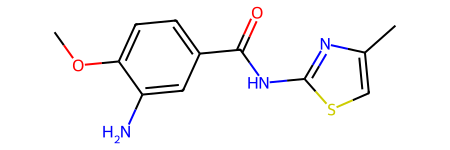

In [5]:
r1

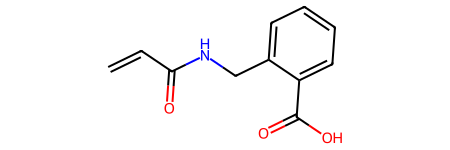

In [6]:
r2

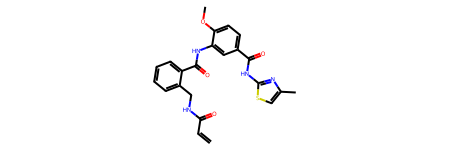

In [7]:
product

In [20]:
wholemol2submol = product.GetSubstructMatch(r1)
wholemol2submol

(31, 30, 29, 28, 27, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 16, 15, 14)

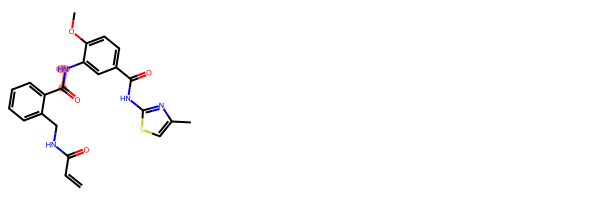

In [44]:
# label these atoms in product to draw
Draw.MolsToGridImage([product], highlightAtomLists=[(12,14)])

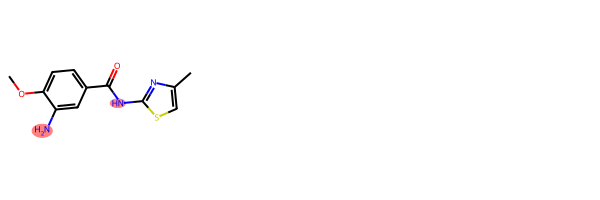

In [42]:
# label atoms in r1
Draw.MolsToGridImage([r1], highlightAtomLists=[(17,8)])

In [45]:
r1mcs = rdFMCS.FindMCS([r1,product])
r1mcs

In [46]:
r1mcs = Chem.MolFromSmarts(r1mcs.smartsString)

In [47]:
matches = product.GetSubstructMatches(r1mcs)
matches = matches[0]
matches

(31, 30, 29, 28, 27, 17, 16, 15, 14, 18, 19, 20, 21, 22, 23, 25, 26, 24)

In [49]:
matches.index(14)

8

In [12]:
attachment_idxs_list = []
for bond in product.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    i_inSub = i in matches
    j_inSub = j in matches
    if int(i_inSub) + int(j_inSub) == 1:
        if i_inSub:
            wholeIdx = j
            try:
                subIdx = matches.index(i)
            except ValueError:
                subIdx = None
        else:
            wholeIdx = i
            try:
                subIdx = matches.index(j)
            except ValueError:
                subIdx = None
        attachment_idxs_list.append((wholeIdx, subIdx))

In [13]:
attachment_idxs_list

[(12, 8)]

In [14]:
r2mcs = rdFMCS.FindMCS([r2,product])
r2mcs

In [15]:
r2mcs = Chem.MolFromSmarts(r2mcs.smartsString)

In [16]:
matches = product.GetSubstructMatches(r2mcs)
matches = matches[0]
matches

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)

In [17]:
attachment_idxs_list = []
for bond in product.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    i_inSub = i in matches
    j_inSub = j in matches
    if int(i_inSub) + int(j_inSub) == 1:
        if i_inSub:
            wholeIdx = j
            try:
                subIdx = matches.index(i)
            except ValueError:
                subIdx = None
        else:
            wholeIdx = i
            try:
                subIdx = matches.index(j)
            except ValueError:
                subIdx = None
        attachment_idxs_list.append((wholeIdx, subIdx))

In [18]:
attachment_idxs_list

[(14, 12)]